In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import utils
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt
#torch.set_printoptions(edgeitems=2) #default 3
#torch.manual_seed(123)

### Create Model

In [2]:
data_path = 'data/'
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))


Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [3]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


frog
cat
frog
dog


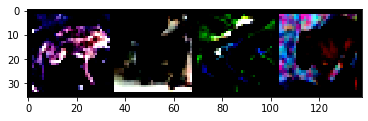

In [4]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])

In [5]:
#classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
class_names = ['car', 'cat']

label_map = {1: 0, 3: 1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [6]:
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [7]:
model = nn.Sequential(
            nn.Linear(3 * 32 * 32, 512),
            nn.Tanh(),
            nn.Linear(512, 2))

In [8]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

In [9]:
x = torch.tensor([1.0, 2.0, 3.0])

sigmoid(x)

tensor([0.7311, 0.8808, 0.9526])

In [10]:
sigmoid(x).sum()

tensor(2.5644)

In [11]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [12]:
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [13]:
softmax(x).sum()

tensor(1.)

In [14]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [15]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

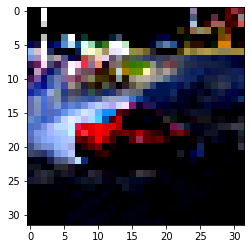

In [16]:
img, label = data_set[20]

plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [17]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.4659, 0.5341]], grad_fn=<SoftmaxBackward>)

In [18]:
_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])

-> car  model: cat


In [19]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 110.0]])

softmax(x)

tensor([[0., 1.]])

In [20]:
torch.log(softmax(x))

tensor([[-inf, 0.]])

In [21]:
log_softmax(x)

tensor([[-110.,    0.]])

In [22]:
torch.exp(log_softmax(x))

tensor([[0., 1.]])

### Use our model

In [23]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

loss = nn.NLLLoss()

In [24]:
img, label = data_set[20]

out = model(img.view(-1).unsqueeze(0))

_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])

loss(out, torch.tensor([label]))

-> car  model: cat


tensor(0.7995, grad_fn=<NllLossBackward>)

In [25]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

In [26]:
learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

lossFunction = nn.NLLLoss()

n_epochs = 5 #100

for epoch in range(n_epochs):
    for img, label in data_set:
        out = model(img.view(-1).unsqueeze(0))
        loss = lossFunction(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.146720
Epoch: 1, Loss: 0.130553
Epoch: 2, Loss: 0.067765
Epoch: 3, Loss: 0.032119
Epoch: 4, Loss: 0.849449


In [27]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))


optimizer = optim.SGD(model.parameters(), lr=0.02)

loss_function = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_function(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.424034
Epoch: 1, Loss: 0.423369
Epoch: 2, Loss: 0.398030
Epoch: 3, Loss: 0.179389
Epoch: 4, Loss: 0.344184
Epoch: 5, Loss: 0.216555
Epoch: 6, Loss: 0.208298
Epoch: 7, Loss: 0.190585
Epoch: 8, Loss: 0.107092
Epoch: 9, Loss: 0.589730
Epoch: 10, Loss: 0.219613
Epoch: 11, Loss: 0.088010
Epoch: 12, Loss: 0.067008
Epoch: 13, Loss: 0.245408
Epoch: 14, Loss: 0.133908
Epoch: 15, Loss: 0.473805
Epoch: 16, Loss: 0.117684
Epoch: 17, Loss: 0.114767
Epoch: 18, Loss: 0.090241
Epoch: 19, Loss: 0.050251
Epoch: 20, Loss: 0.087458
Epoch: 21, Loss: 0.058380
Epoch: 22, Loss: 0.045406
Epoch: 23, Loss: 0.036954
Epoch: 24, Loss: 0.081879
Epoch: 25, Loss: 0.029557
Epoch: 26, Loss: 0.029894
Epoch: 27, Loss: 0.005451
Epoch: 28, Loss: 0.153108
Epoch: 29, Loss: 0.032805
Epoch: 30, Loss: 0.016022
Epoch: 31, Loss: 0.011455
Epoch: 32, Loss: 0.020612
Epoch: 33, Loss: 0.022983
Epoch: 34, Loss: 0.005734
Epoch: 35, Loss: 0.013293
Epoch: 36, Loss: 0.010042
Epoch: 37, Loss: 0.006027
Epoch: 38, Loss: 0.010

In [28]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

Accuracy: 0.866500


->:  car  model: car


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


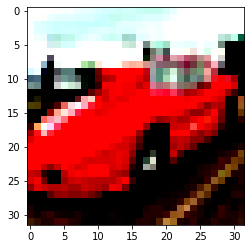

In [29]:
img, label = validation_set[20]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [30]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.366824
Epoch: 1, Loss: 0.379524
Epoch: 2, Loss: 0.648691
Epoch: 3, Loss: 0.261646
Epoch: 4, Loss: 0.392347
Epoch: 5, Loss: 0.478683
Epoch: 6, Loss: 0.411337
Epoch: 7, Loss: 0.453208
Epoch: 8, Loss: 0.324410
Epoch: 9, Loss: 0.321164
Epoch: 10, Loss: 0.294038
Epoch: 11, Loss: 0.270975
Epoch: 12, Loss: 0.343397
Epoch: 13, Loss: 0.255763
Epoch: 14, Loss: 0.130523
Epoch: 15, Loss: 0.117398
Epoch: 16, Loss: 0.070025
Epoch: 17, Loss: 0.329841
Epoch: 18, Loss: 0.064358
Epoch: 19, Loss: 0.108429
Epoch: 20, Loss: 0.198401
Epoch: 21, Loss: 0.323437
Epoch: 22, Loss: 0.598127
Epoch: 23, Loss: 0.062932
Epoch: 24, Loss: 0.077243
Epoch: 25, Loss: 0.108866
Epoch: 26, Loss: 0.826641
Epoch: 27, Loss: 0.052683
Epoch: 28, Loss: 0.056602
Epoch: 29, Loss: 0.012881
Epoch: 30, Loss: 0.113612
Epoch: 31, Loss: 0.027615
Epoch: 32, Loss: 0.045521
Epoch: 33, Loss: 0.277574
Epoch: 34, Loss: 0.021916
Epoch: 35, Loss: 0.007515
Epoch: 36, Loss: 0.007727
Epoch: 37, Loss: 0.008846
Epoch: 38, Loss: 0.049

In [31]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.860000


In [32]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


correct:  car  model: cat


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


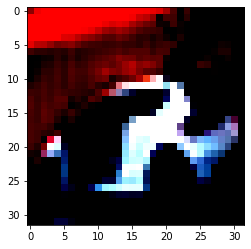

In [33]:
img, label = validation_set[1]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('correct: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))

In [34]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474

In [35]:
sum([p.numel() for p in nn.Linear(3072, 512).parameters()])

1573376

In [36]:
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

3146752

correct: car   model: cat


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


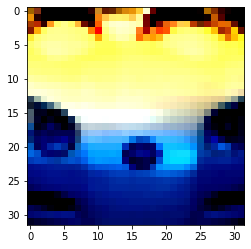

In [37]:
image = request.urlretrieve('https://i.pinimg.com/originals/43/bc/47/43bc47066bb8b2fa4fe7cc8e82cc3714.jpg','test,jpg')
                            
img = Image.open(image[0])

preprocess = transforms.Compose([
        transforms.Resize(48),
        transforms.CenterCrop(32),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4915, 0.4823, 0.4468],
            std=[0.2470, 0.2435, 0.2616]
        )])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print('correct: car ',' model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))